In [769]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [770]:
# read the dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [771]:
df.shape

(1460, 81)

In [772]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [773]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

In [774]:
# Check for null values in numerical variables
df.select_dtypes(include=['int64','float']).isnull().sum()[df.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [775]:
# Although null values are high in some columns, in the data dictionary it is specified that NA is facility is not available
# The facilities may effect price, so we don't drop them. Instead we will replace NA with none

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    
    df[col]=df[col].fillna('None')

In [776]:
# Check for null values again
df.select_dtypes(include=['int64','float']).isnull().sum()[df.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [777]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())

In [778]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [779]:
# Remove categorical attributes that have more than 85% data associated to one value as they don't add much value to analysis

# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,2,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,2,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,2,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,1,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,2,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000


In [780]:
# Check for null in categorical variables
df.select_dtypes(include='object').isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [781]:
# Lets create some new columns from existing data now
# Create a new column for property age
def AgeOfBuilding(record):
    if (record['YearBuilt'] < record['YearRemodAdd']):
        return record['YrSold'] - record['YearRemodAdd']
    else:
        return record['YrSold'] - record['YearBuilt']

df['PropAge'] = df.apply(AgeOfBuilding, axis=1)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,PropAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,1,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,0,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,1,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,0,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,1,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,8


In [782]:
# New columns to check if garageg is old or new. Consider before 2000 as old garage

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df['OldOrNewGarage'] = df['GarageYrBlt'].apply(getGarageConstructionPeriod)
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,PropAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,...,3,1,Gd,8,0,None,Attchd,2003,RFn,2,548,0,61,0,0,0,0,None,0,2,2008,Normal,208500,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,...,3,1,TA,6,1,TA,Attchd,1976,RFn,2,460,298,0,0,0,0,0,None,0,5,2007,Normal,181500,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,...,3,1,Gd,6,1,TA,Attchd,2001,RFn,2,608,0,42,0,0,0,0,None,0,9,2008,Normal,223500,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,...,3,1,Gd,7,1,Gd,Detchd,1998,Unf,3,642,0,35,272,0,0,0,None,0,2,2006,Abnorml,140000,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,...,4,1,Gd,9,1,TA,Attchd,2000,RFn,3,836,192,84,0,0,0,0,None,0,12,2008,Normal,250000,8,1


In [783]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [784]:
# Check for duplicates
df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,PropAge,OldOrNewGarage


### Outlier treatment

In [785]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,PropAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,278000.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,326100.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,1002.790000,505

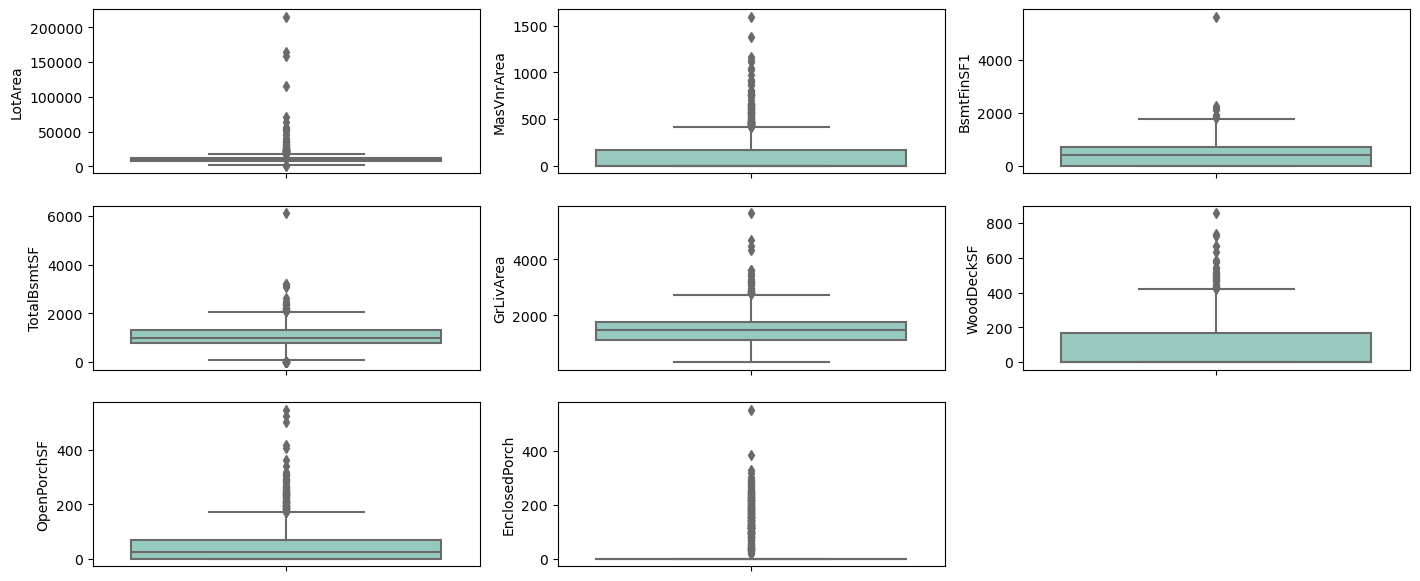

In [786]:
# Outliers
# Check for outliers in numerical columns

plt.figure(figsize=(17, 20))
plt.subplot(8,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(8,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(8,3,3)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = df)
plt.subplot(8,3,4)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = df)
plt.subplot(8,3,5)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = df)
plt.subplot(8,3,6)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(8,3,7)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.subplot(8,3,8)
sns.boxplot(y = 'EnclosedPorch', palette='Set3', data = df)
plt.show()

In [787]:
# As per table, only after 99% looks to have outlier. Let's remove above after 99%. 
# Let's not remove much as we don't have a lot of data
def remove_outliers(x,y):
    q = x[y].quantile(0.99)
    out= x[(x[y] <= q)]
    return out

In [788]:
df = remove_outliers(df,'LotArea')
df = remove_outliers(df,'MasVnrArea')
df = remove_outliers(df,'WoodDeckSF')
df = remove_outliers(df,'OpenPorchSF')
df = remove_outliers(df,'EnclosedPorch')
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,PropAge,OldOrNewGarage
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,731.079308,56.705119,69.378515,9669.186734,6.059841,5.575342,91.571738,431.130497,44.565249,563.588320,1039.284066,1145.775775,332.129056,5.869503,1483.774333,0.418169,0.056236,1.553713,0.376352,2.850757,1.048306,6.454939,0.592646,1.751983,467.932949,86.813987,42.697909,19.849315,3.589041,14.700072,1.656813,43.088681,6.335256,177135.701514,23.082192,0.280461
std,422.741087,42.436545,20.797038,4103.191828,1.347338,1.118156,148.485363,425.153505,156.738707,437.919651,405.985453,362.678175,422.300355,48.778717,481.093857,0.512092,0.236639,0.540395,0.502192,0.809444,0.224353,1.580896,0.633849,0.742778,210.767725,110.917022,56.345989,54.902652,30.068773,54.223013,30.922081,507.233865,2.713749,74278.385198,20.743862,0.449387
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35311.000000,0.000000,0.000000
25%,366.500000,20.000000,60.000000,7500.000000,5.000000,5.000000,0.000000,0.000000,0.000000,218.500000,793.000000,874.000000,0.000000,0.000000,1121.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,320.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129000.000000,4.000000,0.000000
50%,730.000000,50.000000,69.000000,9350.000000,6.000000,5.000000,0.000000,378.000000,0.000000,476.000000,980.000000,1075.000000,0.000000,0.000000,1441.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,475.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,160000.000000,14.000000,0.000000
75%,1097.500000,70.000000,79.000000,11380.500000,7.000000,6.000000,156.500000,698.500000,0.000000,802.000000,1271.500000,1369.000000,716.000000,0.000000,1738.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,165.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,207900.000000,41.500000,1.000000
90%,1315.400000,120.000000,91.000000,14000.000000,8.000000,7.000000,304.400000,1039.400000,99.600000,1223.000000,1580.400000,1656.000000,915.000000,0.000000,2097.000000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.000000,1.000000,3.000000,746.000000,242.400000,124.000000,108.000000,0.000000,0.000000,0.000000,0.000000,10.000000,271940.000000,56.000000,1.000000
95%,1387.700000,160.000000,101.700000,16249.100000,8.000000,8.000000,418.500000,1237.700000,391.000000,1456.300000,1728.000000,1794.100000,1102.400000,0.000000,2362.200000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,3.000000,840.000000,311.100000,161.400000,168.700000,0.000000,155.700000,0.000000,0.000000,11.000000,318718.300000,58.000000,1.000000
99%,1445.140000,190.000000,130.560000,24726.520000,9.000000,9.000000,641.400000,1521.080000,795.480000,1774.420000,2081.480000,2138.800000,1334.100000,360.000000,2833.600000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,3.000000,984.680000,414.280000

In [789]:
# Let's Delete Id and also 3SsnPorch, MiscVal,ScreenPorch as it contains 0 for 99%
# Also drop LowQualFinSF, PoolArea as it's 0 for 90%
df.drop(['Id', '3SsnPorch', 'MiscVal', 'ScreenPorch', 'LowQualFinSF', 'PoolArea'], axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,SaleCondition,SalePrice,PropAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,...,854,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,None,2,Normal,208500,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,...,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,None,5,Normal,181500,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,...,866,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,None,9,Normal,223500,6,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,...,1053,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,None,12,Normal,250000,8,1
5,50,RL,85.0,14115,IR1,Inside,Mitchel,1Fam,1.5Fin,5,5,Gable,VinylSd,VinylSd,None,0.0,TA,Wood,Gd,No,GLQ,732,0,64,796,...,566,1362,1,0,1,1,1,1,TA,5,0,None,Attchd,Unf,2,480,40,30,0,MnPrv,10,Normal,143000,14,0


# EDA

<Axes: xlabel='SalePrice', ylabel='Density'>

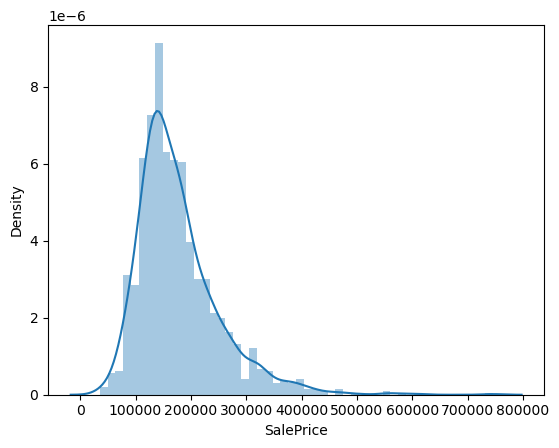

In [790]:
sns.distplot(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

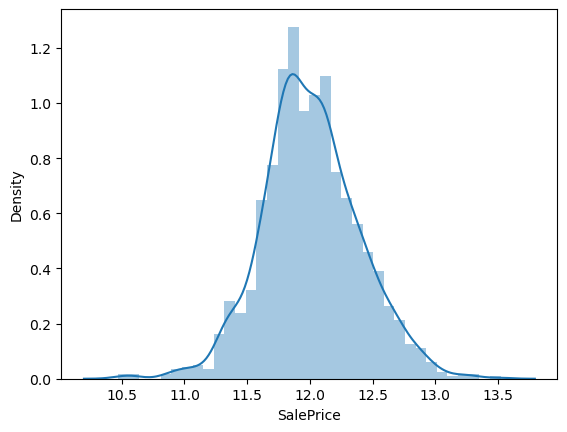

In [791]:
# Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data
df['SalePrice'] = np.log1p(df['SalePrice'])

sns.distplot(df['SalePrice'])

The target value seems to be normalized with some noise.

In [792]:
df.select_dtypes(include=['int64','float']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'PropAge', 'OldOrNewGarage'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

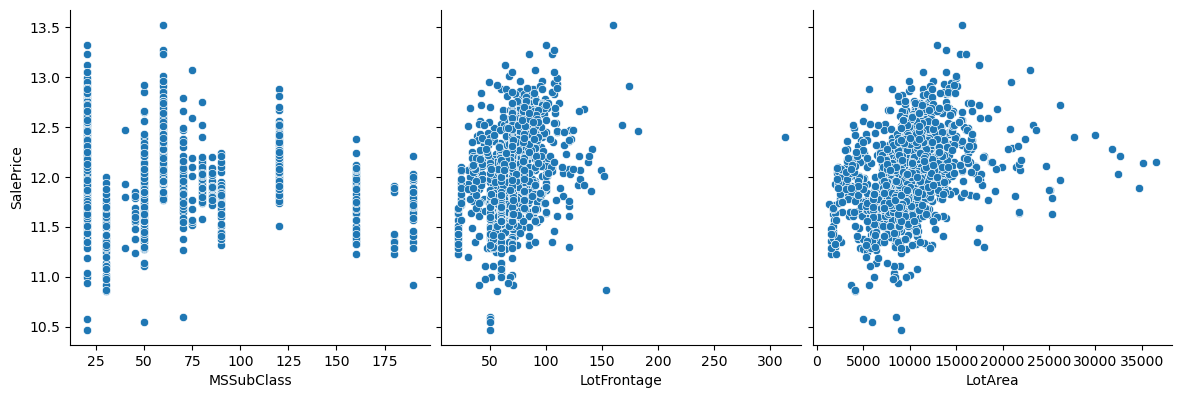

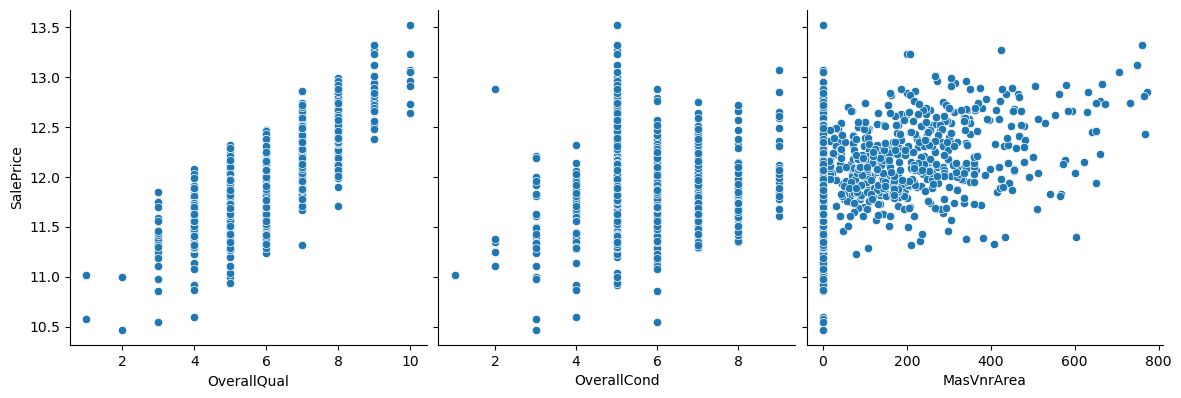

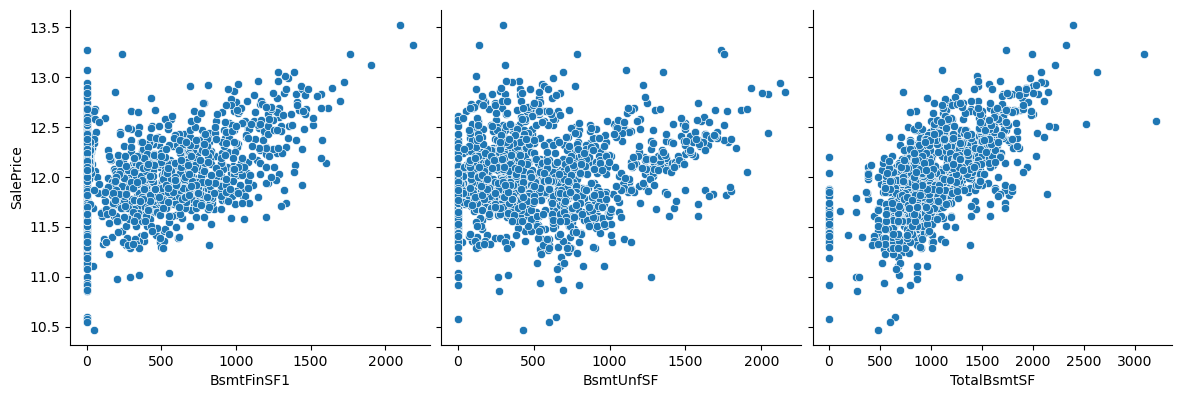

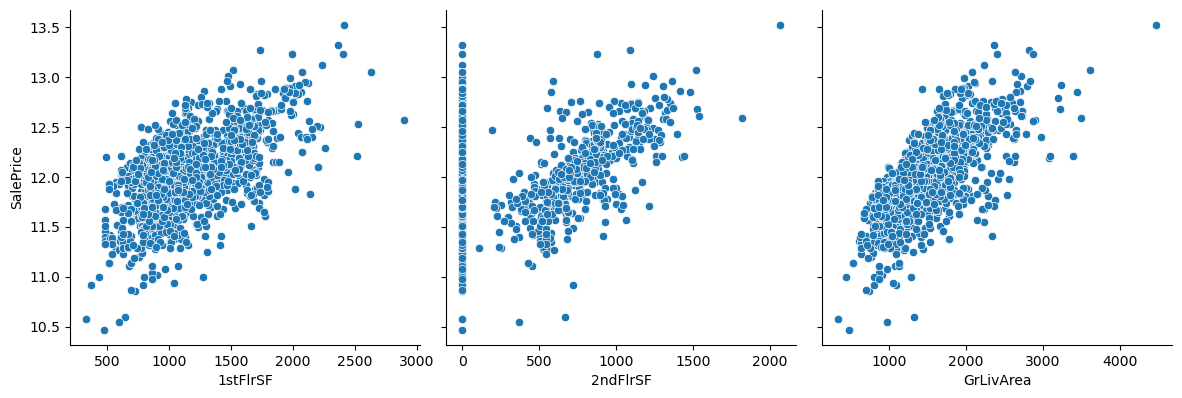

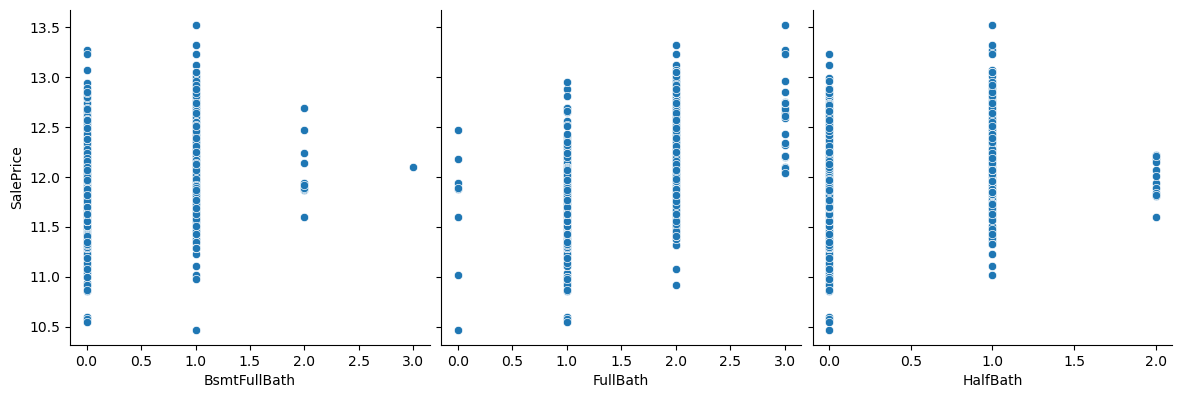

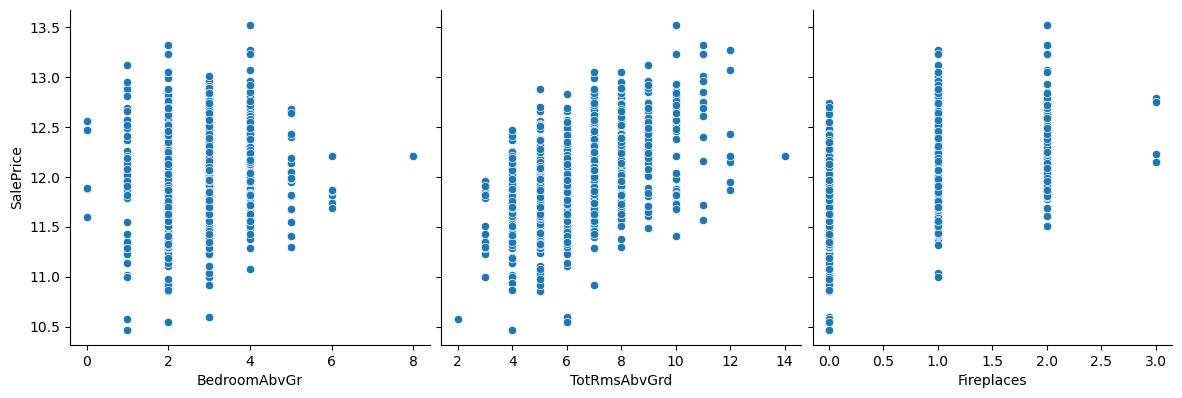

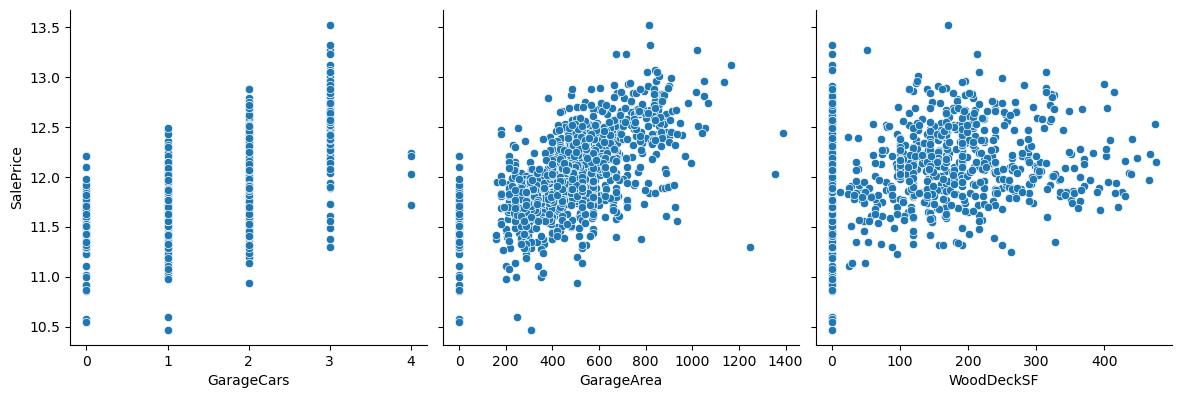

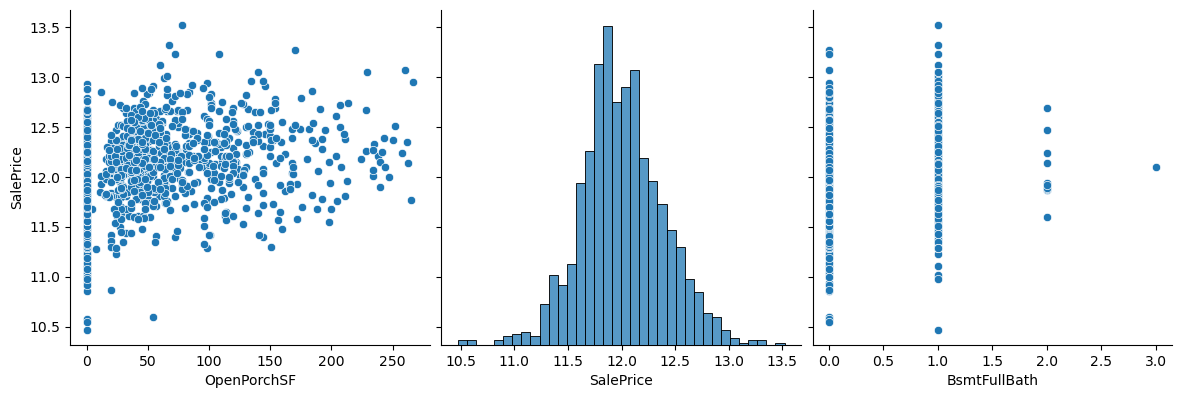

In [793]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OpenPorchSF','SalePrice', 'BsmtFullBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

1stFlrSF, GrLivArea seems to be showing correlation towards right - Rest of the variables are too scattered and hence can be understood during further analysis

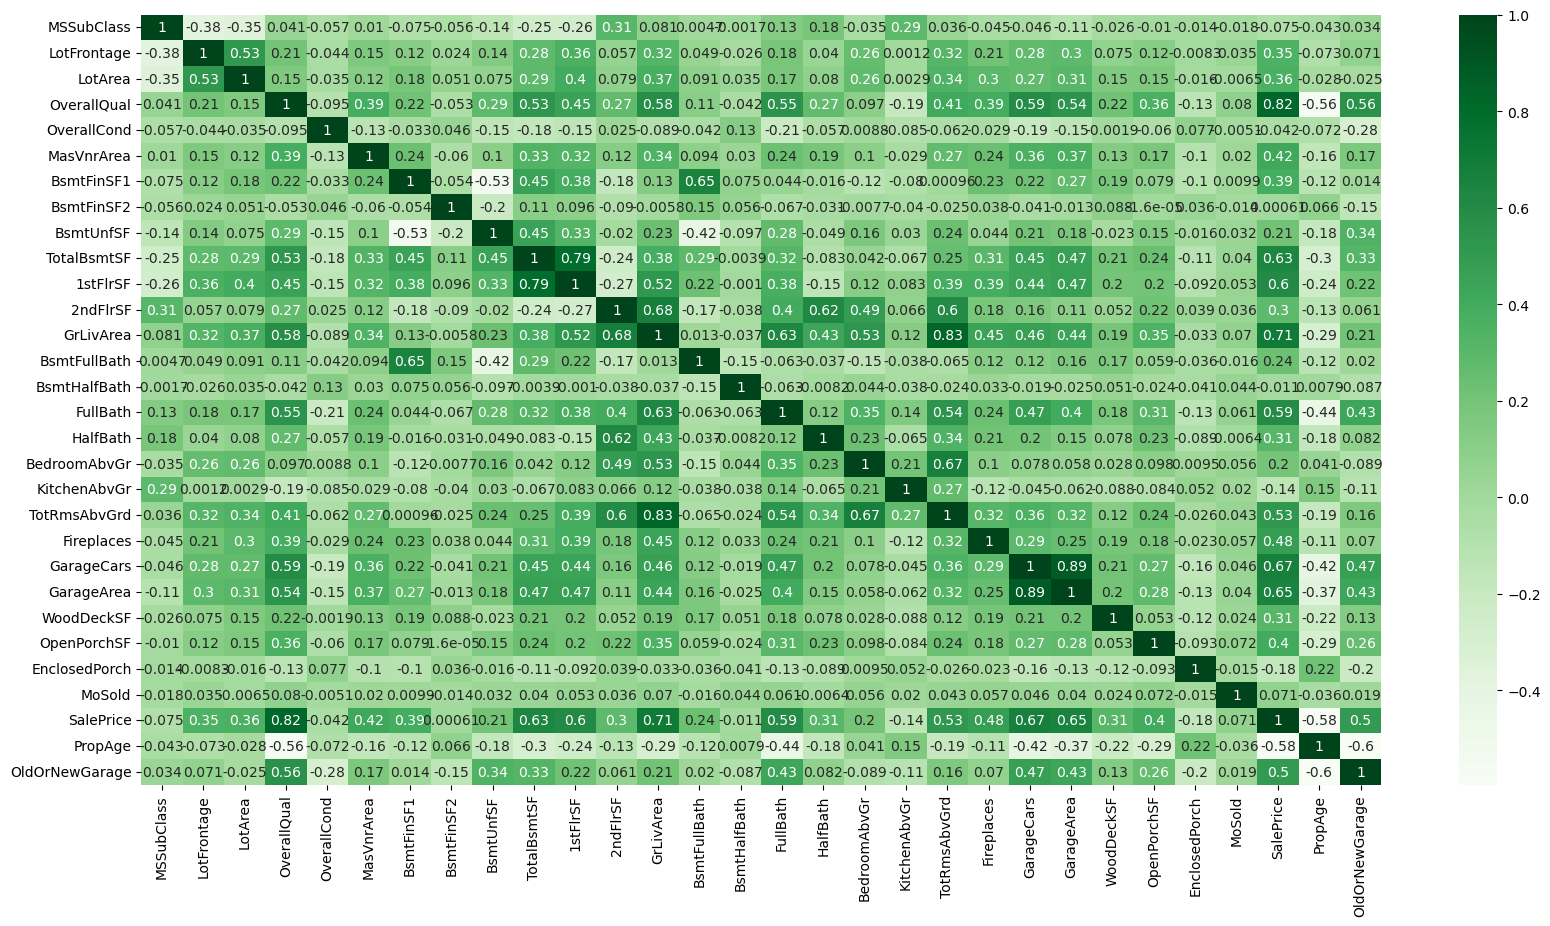

In [794]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="Greens")
plt.show()

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%

In [795]:
# Remove highly correlated variables
df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)
df.shape

(1387, 50)

# Data Preparation

In [796]:
# Create dummies for categorical variables
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,0,2,0,61,0,2,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,1,2,298,0,0,5,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,1,2,0,42,0,9,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,1,3,192,84,0,12,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5,50,85.0,14115,5,5,0.0,732,0,64,796,796,566,1362,1,0,1,1,1,1,0,2,40,30,0,10,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


### Test Train split

In [797]:
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,0,2,0,61,0,2,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,1,2,298,0,0,5,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,1,2,0,42,0,9,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,1,3,192,84,0,12,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
5,50,85.0,14115,5,5,0.0,732,0,64,796,796,566,1362,1,0,1,1,1,1,0,2,40,30,0,10,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [798]:
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
4    12.429220
5    11.870607
Name: SalePrice, dtype: float64

In [799]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=50)

### Sacling the features

In [800]:
df_num = X.select_dtypes(include=['int64', 'float64']).columns
df_num

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'PropAge', 'OldOrNewGarage'],
      dtype='object')

In [801]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.fit_transform(X_test[df_num])

In [802]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1330,-0.860741,0.786025,0.071911,1.477460,-0.517511,2.212964,-0.987564,-0.27408,2.313613,1.372529,1.234828,-0.797387,0.224628,-0.797603,-0.238002,0.831837,-0.746962,0.160396,-0.220774,0.664012,1.703478,0.531058,0.045741,-0.375412,2.127059,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1100,-0.626312,-0.444995,-0.309685,-3.043474,-0.517511,-0.609167,-0.317125,-0.27408,-1.274002,-1.817312,-1.966543,-0.797387,-2.240113,-0.797603,-0.238002,-1.023064,-0.746962,-2.349023,-0.220774,-0.958386,-0.978947,-0.784507,-0.749716,-0.375412,-1.985974,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1080,-0.860741,0.539821,0.319948,-0.029518,1.278501,0.382020,0.529015,-0.27408,0.086038,0.561552,0.316174,-0.797387,-0.482645,-0.797603,4.201648,0.831837,-0.746962,0.160396,-0.220774,-0.958386,0.362266,-0.282035,-0.749716,-0.375412,1.379234,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1231,0.780262,0.047413,-0.469955,-0.783007,0.380495,0.216822,0.868859,-0.27408,-0.589463,0.188012,0.126875,-0.797387,-0.628386,1.146304,-0.238002,-1.023064,-0.746962,0.160396,-0.220774,-0.958386,0.362266,-0.784507,-0.431533,-0.375412,-0.490326,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
775,1.483549,-1.823737,-1.239824,-0.029518,-0.517511,1.593471,1.014506,-0.27408,-0.510391,0.428847,0.165849,-0.797387,-0.598381,1.146304,-0.238002,0.831837,-0.746962,-1.094314,-0.220774,-0.958386,0.362266,-0.784507,3.616458,-0.375412,-0.116414,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [803]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,...,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
555,-0.278939,-0.557171,-0.830076,-0.796834,0.378622,-0.635732,-1.082592,-0.311757,1.009298,-0.171608,-0.272648,-0.763022,-0.852556,-0.863364,-0.239005,-1.029604,-0.756660,-0.959667,-0.204039,0.599511,-1.096412,-0.780231,-0.777872,2.012128,0.574859,...,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
707,1.512401,-1.014894,-0.866154,1.360826,-0.508375,0.497698,1.039145,-0.311757,-0.238907,0.650956,0.472995,-0.763022,-0.314256,1.114784,-0.239005,0.813078,-0.756660,-0.959667,-0.204039,0.599511,0.268375,0.902828,-0.096191,-0.328677,2.003866,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
732,0.079329,0.220958,0.464632,0.641606,-0.508375,0.665136,-0.463035,-0.311757,0.793443,0.226006,0.011020,1.275092,1.064650,-0.863364,-0.239005,0.813078,1.179089,0.238480,-0.204039,0.599511,0.268375,0.902828,0.729002,-0.328677,0.217607,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
231,0.079329,4.752415,1.426901,1.360826,-0.508375,2.622878,0.611356,-0.311757,0.493123,0.993897,0.921461,2.263972,2.552776,1.114784,-0.239005,0.813078,1.179089,1.436627,-0.204039,0.599511,1.633163,-0.780231,1.841219,3.747552,0.217607,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1144,3.184318,-0.465626,0.664611,-1.516054,-1.395372,-0.635732,-0.227013,-0.311757,-0.560343,-0.969321,-1.288452,-0.178051,-1.094401,1.114784,-0.239005,-1.029604,-0.756660,-0.959667,-0.204039,-0.888561,-1.096412,-0.780231,-0.777872,-0.328677,0.217607,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


# Model Building and Evaluation

## Using Linear Regression and RFE (Optional)

In [804]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [805]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# since there are 162. Let's get 70
rfe = RFE(estimator=lm, n_features_to_select=70)            
rfe = rfe.fit(X_train, y_train)

In [806]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 57),
 ('LotFrontage', False, 59),
 ('LotArea', False, 49),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 74),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 68),
 ('BsmtHalfBath', False, 79),
 ('FullBath', False, 40),
 ('HalfBath', False, 43),
 ('BedroomAbvGr', False, 88),
 ('KitchenAbvGr', False, 75),
 ('Fireplaces', False, 78),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 64),
 ('OpenPorchSF', False, 71),
 ('EnclosedPorch', False, 85),
 ('MoSold', False, 83),
 ('PropAge', False, 56),
 ('OldOrNewGarage', False, 52),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 67),
 ('LotShape_Reg', False, 91),
 ('LotConfig_CulDSac', True, 1),
 ('LotConfig_FR2', False, 35),
 ('L

In [807]:
# Select the top 70 variables

cols = X_train.columns[rfe.support_]
cols

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotConfig_CulDSac', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_Stone',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock

In [808]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [809]:
X_train_rfe = pd.DataFrame(X_train[cols])

In [810]:
X_train_rfe.head()

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_Blueste,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,...,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Stone,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_LwQ,BsmtFinType1_None,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
1330,1.477460,-0.517511,-0.987564,-0.27408,2.313613,1.372529,1.234828,-0.797387,0.224628,1.703478,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1100,-3.043474,-0.517511,-0.317125,-0.27408,-1.274002,-1.817312,-1.966543,-0.797387,-2.240113,-0.978947,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0
1080,-0.029518,1.278501,0.529015,-0.27408,0.086038,0.561552,0.316174,-0.797387,-0.482645,0.362266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1231,-0.783007,0.380495,0.868859,-0.27408,-0.589463,0.188012,0.126875,-0.797387,-0.628386,0.362266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
775,-0.029518,-0.517511,1.014506,-0.27408,-0.510391,0.428847,0.165849,-0.797387,-0.598381,0.362266,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [811]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9317454478072664

In [812]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.0527608594376478e+20

R2 score is not good. So let's try other methods Ridge and Lasso

## Ridge

In [813]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [814]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=20]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014401,0.003198,0.007399,0.000800,0.0001,{'alpha': 0.0001},-0.091123,-0.086321,-0.085425,-0.091963,-0.093777,-0.089722,0.003270,25,-0.067207,-0.070277,-0.071166,-0.068972,-0.066548,-0.068834,0.001756
1,0.012202,0.001833,0.006000,0.000633,0.001,{'alpha': 0.001},-0.091116,-0.086306,-0.085412,-0.091959,-0.093765,-0.089711,0.003272,24,-0.067209,-0.070278,-0.071166,-0.068973,-0.066548,-0.068835,0.001755
2,0.009999,0.002188,0.005001,0.001100,0.01,{'alpha': 0.01},-0.091046,-0.086154,-0.085282,-0.091918,-0.093657,-0.089611,0.003300,23,-0.067224,-0.070285,-0.071162,-0.068991,-0.066547,-0.068842,0.001753
3,0.012199,0.000758,0.005398,0.000790,0.1,{'alpha': 0.1},-0.090435,-0.085158,-0.084282,-0.091553,-0.092935,-0.088872,0.003493,22,-0.067350,-0.070378,-0.071181,-0.069115,-0.066586,-0.068922,0.001743
4,0.011214,0.001836,0.005392,0.001024,0.2,{'alpha': 0.2},-0.089891,-0.084304,-0.083471,-0.091209,-0.092519,-0.088279,0.003690,21,-0.067477,-0.070542,-0.071274,-0.069205,-0.066701,-0.069040,0.001743


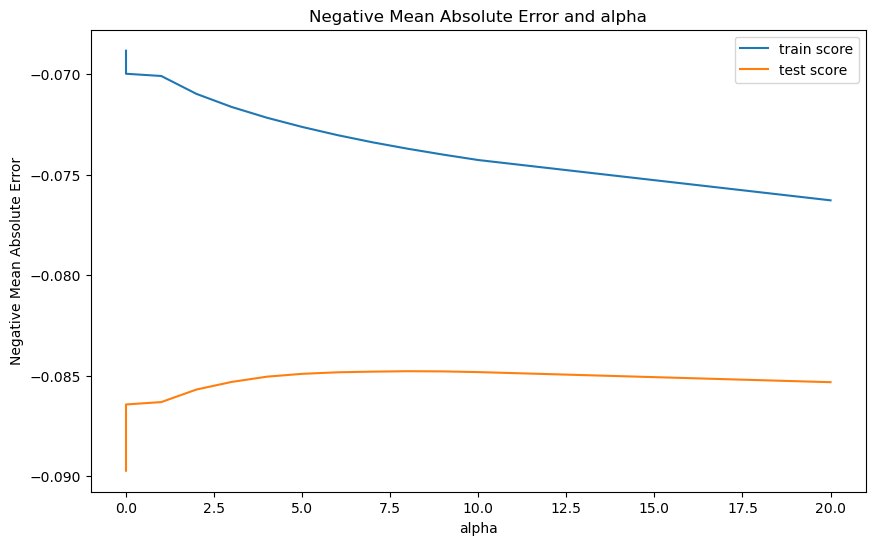

In [815]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(10,6))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [816]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=8.0)

In [817]:
# check the coefficient values with lambda = 8

alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.23082398e-02,  1.11847553e-02,  1.10174345e-02,  8.07696459e-02,
        4.52792998e-02,  6.59688467e-04,  3.83326062e-02,  5.97047086e-03,
        8.28690435e-03,  5.18177734e-02,  2.03302721e-02,  3.47091939e-02,
        6.78942204e-02,  7.82778057e-03,  2.03047824e-03,  2.60464025e-02,
        2.16412997e-02, -1.61872798e-03, -1.02884231e-02,  3.92241412e-03,
        2.86806297e-02,  9.45475140e-03,  5.57817562e-03,  3.44327356e-04,
       -2.43216194e-03, -1.18311543e-02,  1.34093000e-02,  6.37576543e-02,
        3.57217260e-02,  4.46556656e-02,  2.28999526e-02,  2.23966993e-02,
        8.98106795e-04, -1.68310476e-04,  3.66531238e-02, -2.20576409e-02,
       -2.70282545e-02, -1.12432579e-02,  0.00000000e+00, -1.72041812e-02,
        8.63509808e-03,  1.78452853e-03,  5.01927049e-03,  9.31142066e-02,
       -4.07860438e-02, -1.45207915e-02, -6.32032131e-02, -3.45414944e-02,
       -2.03847059e-02,  5.93232465e-03,  2.25108219e-02, -3.37667489e-02,
        3.26366397e-02,  

In [818]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013459221745376747

In [819]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0123
1,LotFrontage,0.0112
2,LotArea,0.0110
3,OverallQual,0.0808
4,OverallCond,0.0453
...,...,...
157,SaleCondition_AdjLand,0.0024
158,SaleCondition_Alloca,0.0065
159,SaleCondition_Family,-0.0075
160,SaleCondition_Normal,0.0550


In [820]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0123,
 'LotFrontage': 0.0112,
 'LotArea': 0.011,
 'OverallQual': 0.0808,
 'OverallCond': 0.0453,
 'MasVnrArea': 0.0007,
 'BsmtFinSF1': 0.0383,
 'BsmtFinSF2': 0.006,
 'BsmtUnfSF': 0.0083,
 'TotalBsmtSF': 0.0518,
 '1stFlrSF': 0.0203,
 '2ndFlrSF': 0.0347,
 'GrLivArea': 0.0679,
 'BsmtFullBath': 0.0078,
 'BsmtHalfBath': 0.002,
 'FullBath': 0.026,
 'HalfBath': 0.0216,
 'BedroomAbvGr': -0.0016,
 'KitchenAbvGr': -0.0103,
 'Fireplaces': 0.0039,
 'GarageCars': 0.0287,
 'WoodDeckSF': 0.0095,
 'OpenPorchSF': 0.0056,
 'EnclosedPorch': 0.0003,
 'MoSold': -0.0024,
 'PropAge': -0.0118,
 'OldOrNewGarage': 0.0134,
 'MSZoning_FV': 0.0638,
 'MSZoning_RH': 0.0357,
 'MSZoning_RL': 0.0447,
 'MSZoning_RM': 0.0229,
 'LotShape_IR2': 0.0224,
 'LotShape_IR3': 0.0009,
 'LotShape_Reg': -0.0002,
 'LotConfig_CulDSac': 0.0367,
 'LotConfig_FR2': -0.0221,
 'LotConfig_FR3': -0.027,
 'LotConfig_Inside': -0.0112,
 'Neighborhood_Blueste': 0.0,
 'Neighborhood_BrDale': -0.0172,
 'Neighborhood_BrkSide': 0.008

In [821]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [822]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.0808
1,MSZoning_FV,True,1,0.0638
3,MSZoning_RL,True,1,0.0447
14,BsmtExposure_Gd,True,1,0.0437
5,Neighborhood_NridgHt,True,1,0.0402
2,MSZoning_RH,True,1,0.0357
4,MSZoning_RM,True,1,0.0229
10,RoofStyle_Shed,True,1,0.0201
13,Foundation_Stone,True,1,0.0200
8,HouseStyle_2.5Fin,True,1,-0.0178


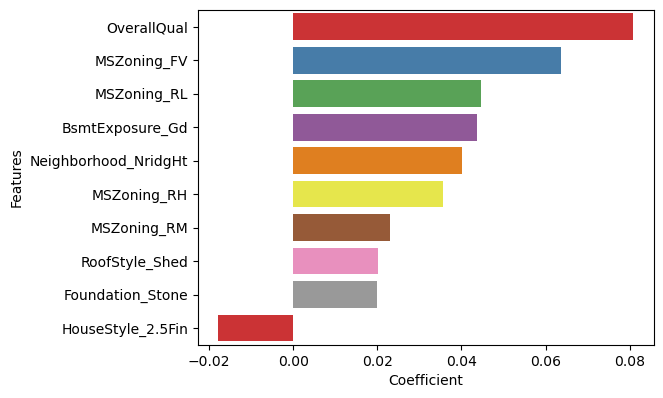

In [823]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

## Lasso

In [824]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [825]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.073347,-0.085724,1
3,0.0004,-0.074757,-0.085812,2
4,0.0005,-0.075896,-0.085875,3
1,0.0002,-0.071658,-0.085876,4
0,0.0001,-0.069890,-0.086184,5
5,0.001,-0.079273,-0.086403,6
6,0.002,-0.083442,-0.088949,7
7,0.003,-0.085925,-0.090846,8
8,0.004,-0.087646,-0.092036,9
9,0.005,-0.088751,-0.092908,10


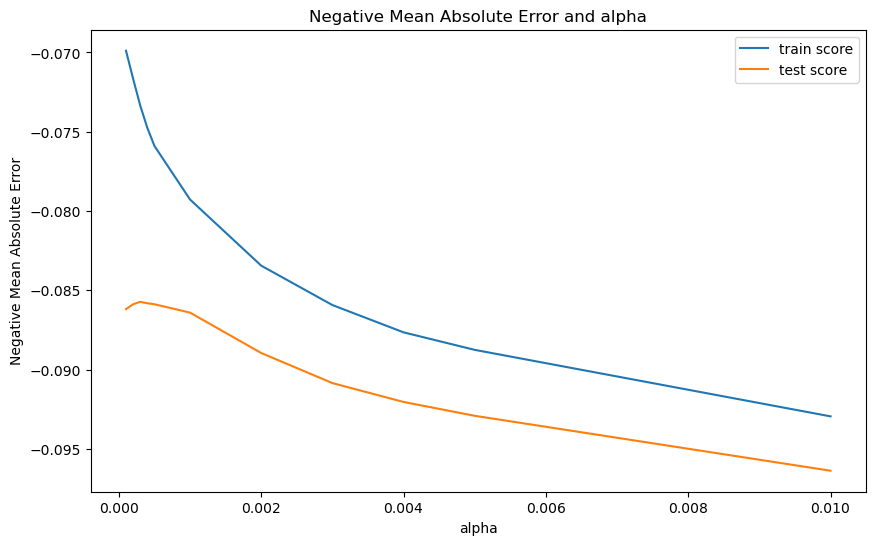

In [826]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
plt.figure(figsize=(10,6))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [827]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [828]:
# check the coefficient values with lambda = 0.0003

alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.38456929e-02,  1.12618865e-02,  9.88855926e-03,  8.23210560e-02,
        4.55974992e-02,  1.72997438e-03,  2.93220096e-02,  2.10794317e-03,
       -0.00000000e+00,  5.79842383e-02,  0.00000000e+00,  7.71237201e-03,
        9.60388281e-02,  8.18356512e-03,  1.88956722e-03,  2.23865292e-02,
        1.97663290e-02, -6.19770964e-05, -7.09712404e-03,  2.20885078e-03,
        3.12021339e-02,  9.95103221e-03,  6.39388594e-03, -0.00000000e+00,
       -2.78666704e-03, -1.13868362e-02,  1.25111453e-02,  1.20318462e-01,
        6.05799466e-02,  6.97773959e-02,  4.72793346e-02,  1.41150973e-02,
        0.00000000e+00,  0.00000000e+00,  4.19547450e-02, -1.10264754e-02,
       -0.00000000e+00, -7.87175281e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.65367616e-03,  1.10186600e-01,
       -3.70582614e-02, -1.73679480e-03, -6.84790704e-02, -1.50015661e-02,
       -1.58480231e-02,  8.08774232e-05,  0.00000000e+00, -2.86848380e-02,
        3.28974732e-02,  

In [829]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.01336433229471861

In [830]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0138
1,LotFrontage,0.0113
2,LotArea,0.0099
3,OverallQual,0.0823
4,OverallCond,0.0456
...,...,...
101,GarageFinish_Unf,-0.0090
102,Fence_GdWo,-0.0036
103,Fence_MnPrv,0.0036
104,SaleCondition_Normal,0.0629


In [831]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.013845692928988858,
 'LotFrontage': 0.011261886508961132,
 'LotArea': 0.00988855926362166,
 'OverallQual': 0.08232105598344958,
 'OverallCond': 0.045597499194477135,
 'MasVnrArea': 0.0017299743785312352,
 'BsmtFinSF1': 0.029322009579760007,
 'BsmtFinSF2': 0.0021079431650229815,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.05798423831572905,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.007712372005329371,
 'GrLivArea': 0.09603882814631727,
 'BsmtFullBath': 0.008183565121281296,
 'BsmtHalfBath': 0.0018895672199473435,
 'FullBath': 0.022386529161800527,
 'HalfBath': 0.019766328997896446,
 'BedroomAbvGr': -6.197709637417525e-05,
 'KitchenAbvGr': -0.0070971240378125315,
 'Fireplaces': 0.002208850780442378,
 'GarageCars': 0.03120213387596062,
 'WoodDeckSF': 0.009951032206283293,
 'OpenPorchSF': 0.006393885941287839,
 'EnclosedPorch': -0.0,
 'MoSold': -0.0027866670365121714,
 'PropAge': -0.011386836226276419,
 'OldOrNewGarage': 0.012511145271264673,
 'MSZoning_FV': 0.12031846194097887,
 'MSZon

In [832]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [833]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.120318
7,Neighborhood_StoneBr,True,1,0.103281
1,GrLivArea,True,1,0.096039
0,OverallQual,True,1,0.082321
4,MSZoning_RL,True,1,0.069777
3,MSZoning_RH,True,1,0.060580
14,BsmtExposure_Gd,True,1,0.049454
5,MSZoning_RM,True,1,0.047279
6,Neighborhood_NridgHt,True,1,0.042760
9,HouseStyle_2.5Fin,True,1,-0.006060


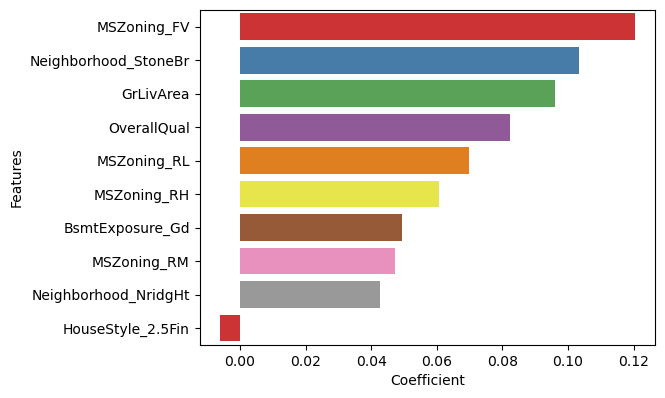

In [834]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Conclusion

- The optimal lambda value in case of ridge and lasso is as below:
  - Ridge - 8.0
  - Lasso - 0.0003

- The Mean Squared error in case of Ridge and Lasso are:
  - Ridge - 0.01345
  - Lasso - 0.01336

- The Mean Squared Error of Lasso is slightly lower than that of Ridge

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

- Hence based on Lasso, the factors generally affect the price are the Zoning Classification, Neighborhood, GrLivArea, Overall Quality, BsmtExposure, HouseStyle

Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.